In [ ]:
import re

def merge_lines(input_path, output_path):
    with open(input_path, "r", encoding="utf-8") as f:
        lines = f.readlines()

    paragraphs = []
    current_para = ""

    for line in lines:
        line = line.strip()
        if not line:
            continue  # bỏ dòng trống

        if current_para:
            # Nếu dòng trước kết thúc câu và dòng này bắt đầu chữ hoa -> xuống đoạn
            if re.search(r"[.!?]$", current_para) and re.match(r"^[A-ZÀ-Ỹ]", line):
                paragraphs.append(current_para.strip())
                current_para = line
            else:
                current_para += " " + line
        else:
            current_para = line

    if current_para:
        paragraphs.append(current_para.strip())

    # Ghi ra file
    with open(output_path, "w", encoding="utf-8") as f:
        for p in paragraphs:
            f.write(p + "\n\n")

    print(f"✅ Đã xử lý {len(paragraphs)} đoạn văn và lưu vào {output_path}")


# Demo
if __name__ == "__main__":
    merge_lines("/content/LS1.txt", "LS1_clean.txt")


✅ Đã xử lý 2378 đoạn văn và lưu vào LS1_clean.txt


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("tuannguyenvananh/vietnamese-plain-text-corpus")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'vietnamese-plain-text-corpus' dataset.
📂 Path to dataset files: /kaggle/input/vietnamese-plain-text-corpus
✅ Đọc 42744 tài liệu, 8 chủ đề.

📚 Thống kê theo chủ đề:
                  num_docs  avg_num_sentences_per_doc  total_sentences  \
topic                                                                    
Phap luat             6656                      13.99            93086   
Chinh tri Xa hoi      6567                      16.33           107270   
The gioi              5716                      14.84            84839   
The thao              5667                      23.97           135847   
Van hoa               5250                      24.69           129629   
Suc khoe              4417                      19.36            85535   
Kinh doanh            4276                      16.63            71098   
Doi song              4195                      28.96           121508   

                  avg_sentence_length  
topic      

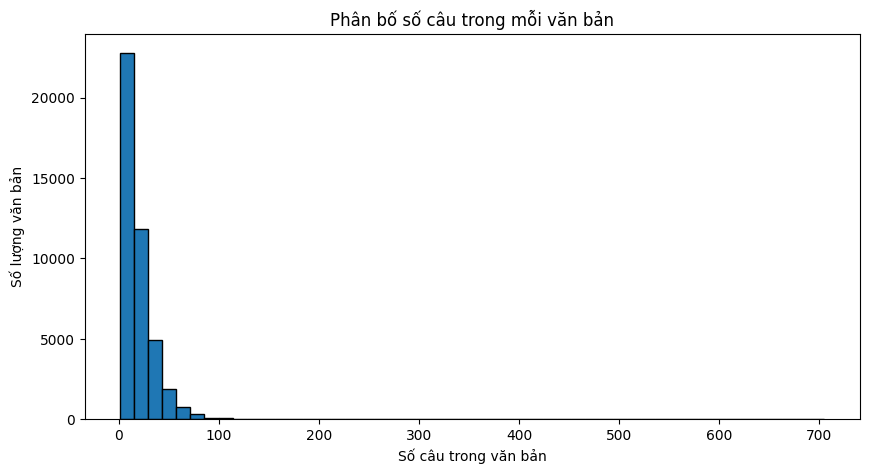

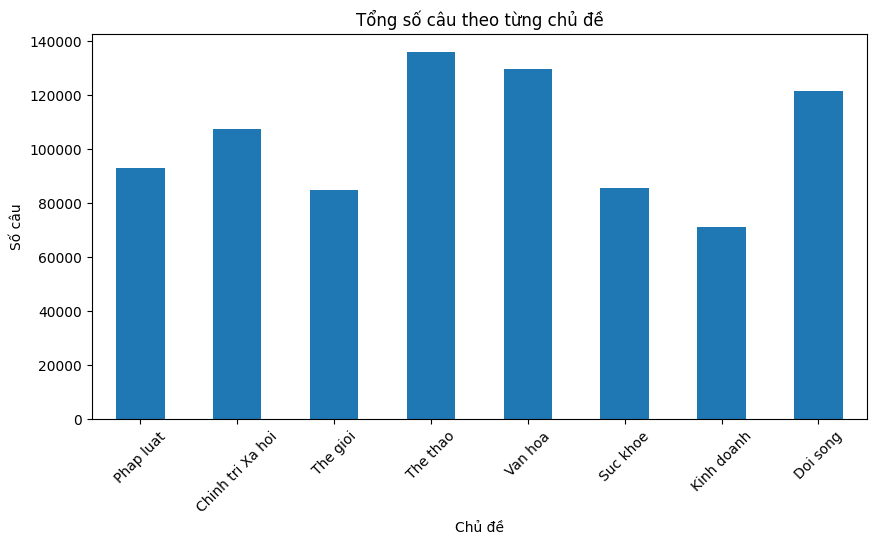

In [ ]:
import kagglehub
import os
import re
import pandas as pd
import matplotlib.pyplot as plt

# 1️⃣ Tải dữ liệu
path = kagglehub.dataset_download("tuannguyenvananh/vietnamese-plain-text-corpus")
print("Path to dataset files:", path)

# 2️⃣ Hàm đọc dữ liệu an toàn
def read_text_files(base_dir):
    data = []
    for root, _, files in os.walk(base_dir):
        for file in files:
            if file.endswith(".txt"):
                file_path = os.path.join(root, file)
                topic = os.path.basename(root)
                text = None
                # Thử nhiều encoding khác nhau
                for enc in ["utf-8", "utf-16", "utf-8-sig", "latin-1"]:
                    try:
                        with open(file_path, "r", encoding=enc) as f:
                            text = f.read().strip()
                        break
                    except Exception:
                        continue
                if text is None:
                    print(f"⚠️ Bỏ qua file lỗi: {file_path}")
                    continue
                data.append({"topic": topic, "text": text})
    return pd.DataFrame(data)

# 3️⃣ Hàm tách câu
def split_sentences(text):
    return re.split(r'(?<=[.!?])\s+', text)

# 4️⃣ Đọc dữ liệu
df = read_text_files(path)
print(f"✅ Đọc {len(df)} tài liệu, {df['topic'].nunique()} chủ đề.")

# 5️⃣ Tính thống kê chi tiết cho từng văn bản
df["sentences"] = df["text"].apply(lambda x: [s.strip() for s in split_sentences(x) if len(s.strip()) > 0])
df["num_sentences"] = df["sentences"].apply(len)
df["avg_sentence_len"] = df["sentences"].apply(lambda sents: sum(len(s.split()) for s in sents) / len(sents) if len(sents) > 0 else 0)

# 6️⃣ Tổng hợp thống kê theo chủ đề
topic_stats = df.groupby("topic").agg({
    "num_sentences": ["count", "mean", "sum"],
    "avg_sentence_len": "mean"
}).round(2)
topic_stats.columns = ["num_docs", "avg_num_sentences_per_doc", "total_sentences", "avg_sentence_length"]
topic_stats = topic_stats.sort_values("num_docs", ascending=False)

print("\n📚 Thống kê theo chủ đề:")
print(topic_stats)

# 7️⃣ Thống kê toàn tập
total_sentences = df["num_sentences"].sum()
avg_sent_per_doc = df["num_sentences"].mean()
avg_sent_len = df["avg_sentence_len"].mean()
print("\n📊 Tổng thể:")
print(f"- Tổng số văn bản: {len(df)}")
print(f"- Tổng số câu: {total_sentences}")
print(f"- Trung bình số câu / văn bản: {avg_sent_per_doc:.2f}")
print(f"- Trung bình độ dài câu (số từ): {avg_sent_len:.2f}")

# 8️⃣ Vẽ biểu đồ
plt.figure(figsize=(10,5))
plt.hist(df["num_sentences"], bins=50, edgecolor='black')
plt.title("Phân bố số câu trong mỗi văn bản")
plt.xlabel("Số câu trong văn bản")
plt.ylabel("Số lượng văn bản")
plt.show()

plt.figure(figsize=(10,5))
topic_stats["total_sentences"].plot(kind="bar")
plt.title("Tổng số câu theo từng chủ đề")
plt.xlabel("Chủ đề")
plt.ylabel("Số câu")
plt.xticks(rotation=45)
plt.show()


In [ ]:
!pip install underthesea

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 71.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 978.4/978.4 kB 52.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 55.5 MB/s eta 0:00:00


# 8/10

### n-grams

In [ ]:
from collections import Counter

# ==== 6. Xây dựng vocab ====
def build_vocab(train_text_path, min_freq=2):
    """
    Xây dựng vocabulary từ tập train.
    - train_text_path: đường dẫn đến file train.txt
    - min_freq: ngưỡng tần suất tối thiểu để giữ token
    """
    print("\nĐang xây dựng vocabulary từ tập train...")

    with open(train_text_path, "r", encoding="utf-8") as f:
        text = f.read()

    # Tách token (các từ đã có sẵn khoảng trắng)
    tokens = text.split()

    # Đếm tần suất xuất hiện
    counter = Counter(tokens)

    # Giữ lại token có tần suất >= min_freq
    vocab = [tok for tok, freq in counter.items() if freq >= min_freq]

    # Thêm các token đặc biệt
    special_tokens = ["<unk>", "<s>", "</s>", "<start_doc>", "<end_doc>"]
    for t in special_tokens:
        if t not in vocab:
            vocab.insert(0, t)

    print(f"Vocabulary gồm {len(vocab):,} token (sau khi lọc tần suất >= {min_freq}).")

    # Lưu vocab ra file
    vocab_path = "/content/vocab3.txt"
    with open(vocab_path, "w", encoding="utf-8") as f:
        for tok in vocab:
            f.write(tok + "\n")

    print(f"Vocab đã được lưu vào {vocab_path}")
    return vocab

# Gọi hàm xây vocab
vocab = build_vocab("/content/train (3).txt", min_freq=2)



Đang xây dựng vocabulary từ tập train...
Vocabulary gồm 90,041 token (sau khi lọc tần suất >= 2).
Vocab đã được lưu vào /content/vocab3.txt


## n-grams

In [ ]:
# ==== 1. Đọc vocab ====
with open("/content/vocab2.txt", "r", encoding="utf-8") as f:
    vocab = [line.strip() for line in f if line.strip()]
vocab_set = set(vocab)

UNK = "<unk>"
START = "<s>"
END = "</s>"
START_DOC = "<start_doc>"
END_DOC = "<end_doc>"


# ==== 2. Đọc dữ liệu huấn luyện ====
def read_corpus(path):
    corpus = []
    with open(path, "r", encoding="utf-8") as f:
        for line in f:
            line = line.strip()
            if not line:
                continue
            tokens = line.split()
            # Thay từ ngoài vocab bằng <unk>
            tokens = [t if t in vocab_set else UNK for t in tokens]
            corpus.append(tokens)
    return corpus


train_data = read_corpus("/content/train (2).txt")
print(f"Đọc {len(train_data)} dòng train.")

Đọc 1 dòng train.


In [ ]:
import random
import math
from collections import defaultdict, Counter

class NgramModel:
    def __init__(self, n, vocab):
        self.n = n
        # loại bỏ <unk> khỏi vocab khi sinh
        self.vocab = [w for w in vocab if w not in {"<unk>", "<UNK>"}]
        self.ngram_counts = defaultdict(Counter)
        self.context_counts = Counter()

    def train(self, corpus):
        for sentence in corpus:
            for i in range(len(sentence) - self.n + 1):
                ngram = tuple(sentence[i:i+self.n])
                context = ngram[:-1]
                token = ngram[-1]
                self.ngram_counts[context][token] += 1
                self.context_counts[context] += 1
        print(f"Huấn luyện xong mô hình {self.n}-gram.")

    def prob(self, context, word, alpha=0.1, epsilon=0.05):
        """Add-α smoothing + label smoothing nhẹ."""
        context = tuple(context)
        numerator = self.ngram_counts[context][word] + alpha
        denominator = self.context_counts[context] + alpha * len(self.vocab)
        p = numerator / denominator
        # label smoothing
        p = (1 - epsilon) * p + epsilon / len(self.vocab)
        return p

    def generate(self, start_text="", max_len=256, max_sentences=3,
                 temperature=0.8, mode="sample"):
        """
        Sinh văn bản với sampling có nhiệt độ.
        mode='greedy' -> chọn xác suất cao nhất
        mode='sample' -> chọn ngẫu nhiên theo phân phối
        """
        if start_text.strip() == "":
            sentence = [START]
        else:
            tokens = start_text.strip().split()
            tokens = [t if t in self.vocab else "<unk>" for t in tokens]
            sentence = [START] + tokens

        sentence_count = 0
        while len(sentence) < max_len:
            context = sentence[-(self.n - 1):]
            probs = [(w, self.prob(context, w)) for w in self.vocab]
            words, p = zip(*probs)

            if mode == "greedy":
                next_word = words[p.index(max(p))]
            else:
                # temperature sampling
                adjusted = [pi ** (1 / temperature) for pi in p]
                next_word = random.choices(words, weights=adjusted, k=1)[0]

            if next_word in {"<end_doc>", END_DOC}:
                break

            sentence.append(next_word)

            if next_word in {"</s>", END}:
                sentence_count += 1
                if sentence_count >= max_sentences:
                    break

        return " ".join(sentence[1:])


In [ ]:
n = 3
model = NgramModel(n, vocab)
model.train(train_data)


Huấn luyện xong mô hình 3-gram.


In [ ]:
# ==== 5. Sinh văn bản ====
prompt = "kế_hoạch đưa_đón miễn_phí"
generated = model.generate(prompt, mode = "greedy")
print("\nVăn bản sinh ra:")
print(generated)


Văn bản sinh ra:
kế_hoạch đưa_đón miễn_phí hành_khách từ vn ( evn ) . </s> <s> theo ông , việc xây_dựng các công_trình xây_dựng . </s> <s> theo ông , việc xây_dựng các công_trình xây_dựng . </s>


# có context

In [ ]:
model = NgramModel(n=5)
model.train(train_data)


Huấn luyện xong mô hình 5-gram với 23692 từ vựng.


In [ ]:
context = "<s> việc xác_định các tuyến"
output = model.generate(start_text=context,  max_len=128, temperature=0.8, mode="greedy")

print("Kết quả sinh:")
print(output)

Kết quả sinh:
<s> việc xác_định các tuyến đường . </s> <s> theo ông <unk> , các trường đại_học , các trường đại_học , các trường đại_học , các trường đại_học , các trường đại_học , các trường đại_học , các trường đại_học , các trường đại_học , các trường đại_học , các trường đại_học , các trường đại_học , các trường đại_học , các trường đại_học , các trường đại_học , các trường đại_học , các trường đại_học , các trường đại_học , các trường đại_học , các trường đại_học , các trường đại_học , các trường đại_học , các trường đại_học , các trường đại_học , các trường đại_học , các trường đại_học , các trường đại_học , các trường đại_học , các trường đại_học , các trường đại_học


In [ ]:
# Sinh tiếp văn bản từ context cho sẵn
context = "dự_kiến , cứ 15 phút"
output = model.generate_paragraph(start_text=context, num_sentences=3, n_context=len(context), temperature=0.8, mode="greedy")

print("Kết quả sinh:")
print(output)


Kết quả sinh:
dự_kiến , cứ 15 phút lại có một cơn lốc xoáy , nhưng trên thực_tế , nhiều trường vẫn " vượt_rào " , tiếp_nhận hồ_sơ từ nhiều ngày_trước và nhận cả những hồ_sơ nộp trực_tiếp . </s> <s> các tỉnh ven biển từ quảng_ninh đến thanh_hóa . </s> <s> do ảnh_hưởng của bão , khu_vực bắc biển đông có gió xoáy mạnh cấp 7 đến thanh_hóa . </s> <s> do ảnh_hưởng của bão , khu_vực bắc biển đông có gió xoáy mạnh cấp 7 , cấp 8 , vùng gần tâm_bão cấp 11-12 , giật trên cấp 10 . biển động rất mạnh . </s> <s> các tỉnh ven biển từ quảng_ninh đến thanh_hóa . </s> <s> do ảnh_hưởng của bão , khu_vực bắc biển đông có gió ven biển từ quảng_ninh đến thanh_hóa . </s> <s> do ảnh_hưởng của bão , khu_vực bắc biển đông có gió xoáy mạnh cấp 7 , cấp 8 , vùng gần tâm_bão cấp 11-12 , giật trên cấp 10 . biển động rất mạnh . </s> <s> các tỉnh ven biển từ quảng_ninh đến thanh_hóa . </s> <s> do ảnh_hưởng của bão , khu_vực bắc


In [ ]:
test_data = read_corpus("/content/test (1).txt")

In [ ]:
model = NgramModel(n=2)
model.train(train_data)

Huấn luyện xong mô hình 2-gram với 23692 từ vựng.


In [ ]:
from statistics import mean

contexts_with_zero = []
probs = []

for sent in test_data:
    for i in range(model.n - 1, len(sent)):
        ctx = tuple(sent[i - model.n + 1:i])
        w = sent[i]
        p = model.prob(ctx, w)
        probs.append(p)
        if model.context_counts[ctx] == 0:
            contexts_with_zero.append(ctx)

print(f"Số context chưa từng thấy: {len(contexts_with_zero)}")
print(f"Tổng context test: {len(probs)}")
print(f"Tỉ lệ unseen context: {len(contexts_with_zero) / len(probs) * 100:.2f}%")
print(f"Xác suất trung bình: {mean(probs):.8f}")


Số context chưa từng thấy: 0
Tổng context test: 292792
Tỉ lệ unseen context: 0.00%
Xác suất trung bình: 0.05869150


In [ ]:
import math
from statistics import mean

def compute_diagnostics(model, test_data, ignore_tokens=None):
    if ignore_tokens is None:
        ignore_tokens = {"<start_doc>", "<end_doc>", "<s>", "</s>"}

    total_log_e = 0.0       # sum ln p
    total_log2 = 0.0        # sum log2 p
    total_tokens = 0
    probs = []

    for sent in test_data:
        for i in range(model.n - 1, len(sent)):
            w = sent[i]
            ctx = sent[i - model.n + 1:i]
            if w in ignore_tokens:
                continue
            p = model.prob(tuple(ctx), w)
            probs.append(p)
            total_log_e += math.log(p + 1e-12)
            total_log2 += math.log2(p + 1e-12)
            total_tokens += 1

    mean_ln = total_log_e / total_tokens
    mean_log2 = total_log2 / total_tokens

    ppl_nats = math.exp(-mean_ln)         # perplexity using natural log
    ppl_bits = 2 ** (-mean_log2)          # perplexity using log2

    print("Total tokens counted:", total_tokens)
    print("Mean p (arithmetic):", mean(probs))
    print("Mean ln(p):", mean_ln)
    print("Mean log2(p):", mean_log2)
    print("Perplexity (nats / exp(-mean_ln)):", ppl_nats)
    print("Perplexity (bits / 2^{-mean_log2}):", ppl_bits)

    # extra diagnostics
    probs_sorted = sorted(probs)
    print("Min p:", probs_sorted[0])
    print("Median p:", probs_sorted[len(probs)//2])
    print("Frac p < 1e-6:", sum(1 for x in probs if x < 1e-6)/len(probs))
    print("Frac p < 1e-3:", sum(1 for x in probs if x < 1e-3)/len(probs))
    return {
        "total_tokens": total_tokens,
        "mean_p": mean(probs),
        "ppl_nats": ppl_nats,
        "ppl_bits": ppl_bits
    }

# gọi:
diagnostics = compute_diagnostics(model, test_data)


Total tokens counted: 271895
Mean p (arithmetic): 0.0062554031271840884
Mean ln(p): -7.06676441256822
Mean log2(p): -10.195185973143577
Perplexity (nats / exp(-mean_ln)): 1172.3486543791714
Perplexity (bits / 2^{-mean_log2}): 1172.3486543798194
Min p: 3.359537727608681e-06
Median p: 0.0008835584223610831
Frac p < 1e-6: 0.0
Frac p < 1e-3: 0.5189687195424705


## LSTM

In [ ]:
import torch

# Đọc vocab
with open("/content/vocab2.txt", "r", encoding="utf-8") as f:
    vocab = [line.strip() for line in f if line.strip()]

word2idx = {w: i for i, w in enumerate(vocab)}
idx2word = {i: w for i, w in enumerate(vocab)}

vocab_size = len(vocab)
print(f"Vocab size: {vocab_size}")


✅ Vocab size: 23692


In [ ]:
def encode_text(text, word2idx, unk_token="<unk>"):
    tokens = text.strip().split()
    return [word2idx.get(t, word2idx[unk_token]) for t in tokens]


In [ ]:
# Đọc dữ liệu đã tokenized
with open("/content/train (2).txt", "r", encoding="utf-8") as f:
    train_text = f.read()

train_ids = encode_text(train_text, word2idx)
print(f"Số lượng token trong train: {len(train_ids):,}")


Số lượng token trong train: 2,367,821


## n-gram 11/10

In [ ]:
UNK = "<unk>"
START = "<s>"
END = "</s>"
START_DOC = "<start_doc>"
END_DOC = "<end_doc>"

In [ ]:
import numpy as np
import random
from collections import defaultdict, Counter
import math


class NgramModel:
    def __init__(self, n, vocab, discount=0.75):
        self.n = n
        self.vocab = [w for w in vocab if w not in {"<unk>", "<UNK>"}]
        self.discount = discount
        self.ngram_counts = defaultdict(Counter)
        self.context_counts = Counter()
        self.lower_order = None

    def train(self, corpus):
        for sentence in corpus:
            for i in range(len(sentence) - self.n + 1):
                ngram = tuple(sentence[i:i+self.n])
                context = ngram[:-1]
                token = ngram[-1]
                self.ngram_counts[context][token] += 1
                self.context_counts[context] += 1

        if self.n > 1:
            self.lower_order = NgramModel(self.n - 1, self.vocab, self.discount)
            self.lower_order.train(corpus)

        print(f"Huấn luyện xong mô hình {self.n}-gram (Kneser–Ney) với {len(self.vocab)} từ.")

    def continuation_prob(self, word):
        contexts_with_word = sum(1 for ctx in self.ngram_counts if word in self.ngram_counts[ctx])
        total_contexts = len(self.ngram_counts)
        return contexts_with_word / total_contexts if total_contexts > 0 else 1e-8

    def prob(self, context, word):
        context = tuple(context)
        count_context = self.context_counts[context]
        count_ngram = self.ngram_counts[context][word]

        if self.n == 1:
            return self.continuation_prob(word)

        if count_context > 0:
            p_cont = self.lower_order.prob(context[1:], word)
            unique_followers = len(self.ngram_counts[context])
            prob = max(count_ngram - self.discount, 0) / count_context
            prob += (self.discount * unique_followers / count_context) * p_cont
        else:
            prob = self.lower_order.prob(context[1:], word)

        return prob

    def perplexity(self, corpus):
        N = 0
        log_prob_sum = 0
        for sentence in corpus:
            for i in range(self.n - 1, len(sentence)):
                context = tuple(sentence[i - self.n + 1:i])
                word = sentence[i]
                p = self.prob(context, word)
                log_prob_sum += -math.log(p + 1e-12)
                N += 1
        return math.exp(log_prob_sum / N)

    def generate(self, start_text="", max_len=200, max_sentences=4, temperature=0.8, mode="sample"):
        """Sinh văn bản bằng Kneser–Ney."""
        if start_text.strip() == "":
            sentence = [START]
        else:
            tokens = start_text.strip().split()
            tokens = [t if t in self.vocab else "<unk>" for t in tokens]
            sentence = [START] + tokens

        sentence_count = 0
        while len(sentence) < max_len:
            context = sentence[-(self.n - 1):]
            probs = [self.prob(context, w) for w in self.vocab]
            words = self.vocab

            if mode == "greedy":
                next_word = words[int(np.argmax(probs))]
                p_next = max(probs)
            else:
                adjusted = np.array(probs) ** (1 / temperature)
                adjusted /= np.sum(adjusted)
                next_word = random.choices(words, weights=adjusted, k=1)[0]
                p_next = self.prob(context, next_word)

            print(f"p({next_word} | {' '.join(context)}) = {p_next:.6f}")

            if next_word == END:
                sentence_count += 1
                if (sentence_count >= max_sentences) or (next_word == END_DOC) :
                    break
                sentence.append(END)
                sentence.append(START)
                continue

            sentence.append(next_word)

        return " ".join(sentence[1:])



In [ ]:
def read_corpus(path):
    corpus = []
    with open(path, "r", encoding="utf-8") as f:
        for line in f:
            tokens = line.strip().split()
            if not tokens:
                continue
            sentence = []
            for tok in tokens:
                if tok == START:
                    sentence = [START]
                elif tok == END:
                    sentence.append(END)
                    corpus.append(sentence)
                    sentence = []
                else:
                    sentence.append(tok)
    return corpus

In [ ]:

model = NgramModel(n=5, vocab=vocab, discount=1)
model.train(train_corpus)

print("Perplexity train:", model.perplexity(train_corpus))
print("Perplexity test:", model.perplexity(test_corpus))


# # Bước 3: Huấn luyện
# n = 4
# model = NgramModel(n=n, vocab=vocab)
# model.train(train_corpus)

# # Bước 4: Đánh giá
# ppl_train = model.perplexity(train_corpus)
# ppl_test = model.perplexity(test_corpus)
# print(f"Perplexity train: {ppl_train:.2f}")
# print(f"Perplexity test: {ppl_test:.2f}")

# alphas = [0.05, 0.1, 0.2, 0.5, 1.0]
# for a in alphas:
#     ppl_train = model.perplexity(train_corpus, alpha=a)
#     ppl_test = model.perplexity(test_corpus, alpha=a)
#     print(f"alpha={a}: ppl_train={ppl_train:.2f}, ppl_test={ppl_test:.2f}")

# # Bước 5: Sinh văn bản
# start = "tp hcm tìm quỹ nhà để giải_tỏa"
# print("\nSinh văn bản:")
# output = model.generate(start_text=start, mode="greedy", temperature=0.8)
# print(f"Input: {start}\nOutput: {output}")

Huấn luyện xong mô hình 1-gram (Kneser–Ney) với 90040 từ.
Huấn luyện xong mô hình 2-gram (Kneser–Ney) với 90040 từ.
Huấn luyện xong mô hình 3-gram (Kneser–Ney) với 90040 từ.
Huấn luyện xong mô hình 4-gram (Kneser–Ney) với 90040 từ.
Huấn luyện xong mô hình 5-gram (Kneser–Ney) với 90040 từ.
Perplexity train: 6.452547029896682
Perplexity test: 10.225737224827082


In [ ]:
from collections import Counter
def oov_rate(train_corpus, test_corpus):
    vocab = set(w for s in train_corpus for w in s)
    total = 0
    oov = 0
    for s in test_corpus:
        for w in s:
            total += 1
            if w not in vocab:
                oov += 1
    return oov/total
print("OOV rate:", oov_rate(train_corpus, test_corpus))


OOV rate: 0.008881292534086484


In [ ]:
start = "<start_doc> <s> tp hcm tìm quỹ nhà để giải_tỏa"


# print("\n=== Sinh văn bản ===")
# print(model.generate(start_text=start, max_len=200, max_sentences=4, temperature=0.8, mode="greedy"))


print("\nSinh văn bản:")
output = model.generate(start_text=start, max_sentences=4, temperature=0.8, mode="greedy")
print(f"Input: {start}\nOutput: {output}")


Sinh văn bản:
p(. | quỹ nhà để giải_tỏa) = 0.273200
p(</s> | nhà để giải_tỏa .) = 0.999755
p(- | giải_tỏa . </s> <s>) = 0.070647
p(tôi | . </s> <s> -) = 0.119180
p(không | </s> <s> - tôi) = 0.157870
p(có | <s> - tôi không) = 0.143088
p(ý_định | - tôi không có) = 0.295726
p(trở_thành | tôi không có ý_định) = 0.217206
p(một | không có ý_định trở_thành) = 0.646600
p(diễn_viên | có ý_định trở_thành một) = 0.170681
p(chuyên_nghiệp | ý_định trở_thành một diễn_viên) = 0.619046
p(? | trở_thành một diễn_viên chuyên_nghiệp) = 0.437604
p(</s> | một diễn_viên chuyên_nghiệp ?) = 0.998261
p(- | chuyên_nghiệp ? </s> <s>) = 0.070647
p(tôi | ? </s> <s> -) = 0.119180
p(không | </s> <s> - tôi) = 0.157870
p(có | <s> - tôi không) = 0.143088
p(ý_định | - tôi không có) = 0.295726
p(trở_thành | tôi không có ý_định) = 0.217206
p(một | không có ý_định trở_thành) = 0.646600
p(diễn_viên | có ý_định trở_thành một) = 0.170681
p(chuyên_nghiệp | ý_định trở_thành một diễn_viên) = 0.619046
p(? | trở_thành một diễn_viê

In [ ]:
import math, random
from collections import defaultdict, Counter

START = "<s>"
END = "</s>"

# ======================
# Đọc dữ liệu
# ======================
def read_corpus(path):
    corpus = []
    with open(path, "r", encoding="utf-8") as f:
        for line in f:
            tokens = line.strip().split()
            if not tokens:
                continue
            sentence = []
            for tok in tokens:
                if tok == START:
                    sentence = [START]
                elif tok == END:
                    sentence.append(END)
                    corpus.append(sentence)
                    sentence = []
                else:
                    sentence.append(tok)
    return corpus


# ======================
# Mô hình Kneser–Ney
# ======================
class NgramModel:
    def __init__(self, n, vocab, discount=0.75):
        self.n = n
        self.vocab = vocab
        self.discount = discount
        self.ngram_counts = defaultdict(Counter)
        self.context_counts = Counter()
        self.lower_order = None

    def train(self, corpus):
        for sentence in corpus:
            for i in range(len(sentence) - self.n + 1):
                ngram = tuple(sentence[i:i+self.n])
                context = ngram[:-1]
                token = ngram[-1]
                self.ngram_counts[context][token] += 1
                self.context_counts[context] += 1

        # huấn luyện lower order
        if self.n > 1:
            self.lower_order = NgramModel(self.n - 1, self.vocab, self.discount)
            self.lower_order.train(corpus)

        print(f"Huấn luyện xong {self.n}-gram (Kneser–Ney) với {len(self.vocab)} từ.")

    def continuation_prob(self, word):
        contexts_with_word = sum(1 for ctx in self.ngram_counts if word in self.ngram_counts[ctx])
        total_contexts = len(self.ngram_counts)
        return contexts_with_word / total_contexts if total_contexts > 0 else 1e-8

    def prob(self, context, word):
        context = tuple(context)
        count_context = self.context_counts[context]
        count_ngram = self.ngram_counts[context][word]

        if self.n == 1:
            return self.continuation_prob(word)

        if count_context > 0:
            p_cont = self.lower_order.prob(context[1:], word)
            unique_followers = len(self.ngram_counts[context])
            prob = max(count_ngram - self.discount, 0) / count_context
            prob += (self.discount * unique_followers / count_context) * p_cont
        else:
            prob = self.lower_order.prob(context[1:], word)

        return prob

    def perplexity(self, corpus):
        N = 0
        log_prob_sum = 0
        for sentence in corpus:
            for i in range(self.n - 1, len(sentence)):
                context = tuple(sentence[i - self.n + 1:i])
                word = sentence[i]
                p = self.prob(context, word)
                log_prob_sum += -math.log(p + 1e-12)
                N += 1
        return math.exp(log_prob_sum / N)

    def generate(self, start_text="", max_len=120, temperature=0.8, mode="sample"):
        if not start_text.strip():
            sentence = [START]
        else:
            tokens = start_text.strip().split()
            sentence = [START] + [t if t in self.vocab else "<unk>" for t in tokens]

        while len(sentence) < max_len:
            context = sentence[-(self.n - 1):]
            probs = [self.prob(context, w) for w in self.vocab]
            words = self.vocab

            if mode == "greedy":
                next_word = words[probs.index(max(probs))]
            else:
                adjusted = [p ** (1 / temperature) for p in probs]
                total = sum(adjusted)
                adjusted = [p / total for p in adjusted]
                next_word = random.choices(words, weights=adjusted, k=1)[0]

            print(f"[CTX: {' '.join(context)}] → {next_word} (p={max(probs):.6f})")
            if next_word == END:
                break
            sentence.append(next_word)

        return " ".join(sentence[1:])


# ======================
# Pruning
# ======================
def prune_counts(model, min_count=2):
    new_ngram = defaultdict(Counter)
    new_context = Counter()
    for ctx, counter in model.ngram_counts.items():
        for w, c in counter.items():
            if c >= min_count:
                new_ngram[ctx][w] = c
                new_context[ctx] += c
    model.ngram_counts = new_ngram
    model.context_counts = new_context


# ======================
# Linear interpolation
# ======================
def interp_prob(models, context, word, lambdas):
    p = 0.0
    for m, lam in zip(models, lambdas):
        ctx_len = m.n - 1
        ctx = context[-ctx_len:] if ctx_len > 0 else []
        p += lam * m.prob(ctx, word)
    return p

def interp_perplexity(models, corpus, lambdas):
    N = 0
    log_prob_sum = 0
    for sentence in corpus:
        for i in range(max(m.n for m in models) - 1, len(sentence)):
            context = sentence[i - models[0].n + 1:i]
            word = sentence[i]
            p = interp_prob(models, context, word, lambdas)
            log_prob_sum += -math.log(p + 1e-12)
            N += 1
    return math.exp(log_prob_sum / N)


# ======================
# THỰC NGHIỆM
# ======================
train_path = "/content/train (3).txt"
test_path = "/content/test (2).txt"

train_corpus = read_corpus(train_path)
test_corpus = read_corpus(test_path)
# vocab = list({w for sent in train_corpus for w in sent})
import torch

# Đọc vocab
with open("/content/vocab3.txt", "r", encoding="utf-8") as f:
    vocab = [line.strip() for line in f if line.strip()]

word2idx = {w: i for i, w in enumerate(vocab)}
idx2word = {i: w for i, w in enumerate(vocab)}

vocab_size = len(vocab)
print(f"Vocab size: {vocab_size}")

results = []

# for n in [3, 4, 5]:
#     for D in [0.5, 0.75, 1.0]:
#         model = NgramModel(n, vocab, discount=D)
#         model.train(train_corpus)
#         ppl_train = model.perplexity(train_corpus)
#         ppl_test = model.perplexity(test_corpus)
#         results.append((n, D, ppl_train, ppl_test))

# print("\n===== BẢNG SO SÁNH PERPLEXITY =====")
# print("n\tDiscount\tTrain PPL\tTest PPL")
# for n, D, tr, te in results:
#     print(f"{n}\t{D:.2f}\t\t{tr:.2f}\t\t{te:.2f}")

# Thử pruning cho mô hình tốt nhất
# # best_n, best_D, _, _ = min(results, key=lambda x: x[3])
best_model = NgramModel(5, vocab, discount=1)
# best_model.train(train_corpus)
# prune_counts(best_model, min_count=2)
# print(f"\nSau pruning (n={5}, D={1}): Test PPL = {best_model.perplexity(test_corpus):.2f}")

# Linear interpolation (3+4+5)
models = []
for n in [3, 4]:
    m = NgramModel(n, vocab, discount=0.75)
    m.train(train_corpus)
    models.append(m)
lambdas = [0.5, 0.3, 0.2]
interp_ppl = interp_perplexity(models, test_corpus, lambdas)
print(f"\nInterpolation (λ={lambdas}): Test PPL = {interp_ppl:.2f}")

# Sinh thử văn bản
print("\n===== SINH VĂN BẢN =====")
prompt = "<start_doc> <s> tp hcm tìm quỹ nhà để giải_tỏa"
print("Greedy:")
print(best_model.generate(prompt, mode="greedy"))
print("\nSampling:")
print(best_model.generate(prompt, mode="sample", temperature=0.8))


Vocab size: 90041
Huấn luyện xong 1-gram (Kneser–Ney) với 90041 từ.
Huấn luyện xong 2-gram (Kneser–Ney) với 90041 từ.
Huấn luyện xong 3-gram (Kneser–Ney) với 90041 từ.
Huấn luyện xong 1-gram (Kneser–Ney) với 90041 từ.
Huấn luyện xong 2-gram (Kneser–Ney) với 90041 từ.
Huấn luyện xong 3-gram (Kneser–Ney) với 90041 từ.
Huấn luyện xong 4-gram (Kneser–Ney) với 90041 từ.

Interpolation (λ=[0.5, 0.3, 0.2]): Test PPL = 3.30

===== SINH VĂN BẢN =====
Greedy:


AttributeError: 'NoneType' object has no attribute 'prob'

In [19]:
import math, random, pickle
from collections import defaultdict, Counter

START = "<s>"
END = "</s>"

# ======================
# Đọc dữ liệu
# ======================
def read_corpus(path):
    corpus = []
    with open(path, "r", encoding="utf-8") as f:
        for line in f:
            tokens = line.strip().split()
            if not tokens:
                continue
            sentence = []
            for tok in tokens:
                if tok == START:
                    sentence = [START]
                elif tok == END:
                    sentence.append(END)
                    corpus.append(sentence)
                    sentence = []
                else:
                    sentence.append(tok)
    return corpus

In [ ]:
# ======================
# THỰC NGHIỆM
# ======================
train_path = "/content/train (3).txt"
test_path = "/content/test (2).txt"

train_corpus = read_corpus(train_path)
test_corpus = read_corpus(test_path)

import torch

# Đọc vocab
with open("/content/vocab3.txt", "r", encoding="utf-8") as f:
    vocab = [line.strip() for line in f if line.strip()]

word2idx = {w: i for i, w in enumerate(vocab)}
idx2word = {i: w for i, w in enumerate(vocab)}

vocab_size = len(vocab)
print(f"Vocab size: {vocab_size}")


Vocab size: 90041


In [17]:

# ======================
# Mô hình Kneser–Ney
# ======================
class NgramModel:
    def __init__(self, n, vocab, discount=0.75):
        self.n = n
        self.vocab = vocab
        self.discount = discount
        self.ngram_counts = defaultdict(Counter)
        self.context_counts = Counter()
        self.lower_order = None

    def train(self, corpus):
        for sentence in corpus:
            for i in range(len(sentence) - self.n + 1):
                ngram = tuple(sentence[i:i+self.n])
                context = ngram[:-1]
                token = ngram[-1]
                self.ngram_counts[context][token] += 1
                self.context_counts[context] += 1

        # huấn luyện lower order
        if self.n > 1:
            self.lower_order = NgramModel(self.n - 1, self.vocab, self.discount)
            self.lower_order.train(corpus)

        print(f"Huấn luyện xong {self.n}-gram (Kneser–Ney) với {len(self.vocab)} từ.")

    def continuation_prob(self, word):
        contexts_with_word = sum(1 for ctx in self.ngram_counts if word in self.ngram_counts[ctx])
        total_contexts = len(self.ngram_counts)
        return contexts_with_word / total_contexts if total_contexts > 0 else 1e-8

    def prob(self, context, word):
        context = tuple(context)
        count_context = self.context_counts[context]
        count_ngram = self.ngram_counts[context][word]

        if self.n == 1:
            return self.continuation_prob(word)

        if count_context > 0:
            p_cont = self.lower_order.prob(context[1:], word)
            unique_followers = len(self.ngram_counts[context])
            prob = max(count_ngram - self.discount, 0) / count_context
            prob += (self.discount * unique_followers / count_context) * p_cont
        else:
            prob = self.lower_order.prob(context[1:], word)

        return prob

    def perplexity(self, corpus):
        N = 0
        log_prob_sum = 0
        for sentence in corpus:
            for i in range(self.n - 1, len(sentence)):
                context = tuple(sentence[i - self.n + 1:i])
                word = sentence[i]
                p = self.prob(context, word)
                log_prob_sum += -math.log(p + 1e-12)
                N += 1
        return math.exp(log_prob_sum / N)

    def generate(self, start_text="", max_len=120, temperature=0.8, mode="sample"):
        if not start_text.strip():
            sentence = [START]
        else:
            tokens = start_text.strip().split()
            sentence = [START] + [t if t in self.vocab else "<unk>" for t in tokens]

        while len(sentence) < max_len:
            context = sentence[-(self.n - 1):]
            probs = [self.prob(context, w) for w in self.vocab]
            words = self.vocab

            if mode == "greedy":
                next_word = words[probs.index(max(probs))]
            else:
                adjusted = [p ** (1 / temperature) for p in probs]
                total = sum(adjusted)
                adjusted = [p / total for p in adjusted]
                next_word = random.choices(words, weights=adjusted, k=1)[0]

            print(f"[CTX: {' '.join(context)}] → {next_word} (p={max(probs):.6f})")
            if next_word == END:
                break
            sentence.append(next_word)

        return " ".join(sentence[1:])

def save_model(model, path):
    """Lưu mô hình đã huấn luyện (kể cả lower_order)"""
    with open(path, "wb") as f:
        pickle.dump(model, f)
    print(f"Đã lưu mô hình vào: {path}")

def load_model(path):
    """Tải lại mô hình"""
    with open(path, "rb") as f:
        model = pickle.load(f)
    print(f"Đã tải mô hình từ: {path}")
    return model

# ======================
# Pruning
# ======================
def prune_counts(model, min_count=2):
    new_ngram = defaultdict(Counter)
    new_context = Counter()
    for ctx, counter in model.ngram_counts.items():
        for w, c in counter.items():
            if c >= min_count:
                new_ngram[ctx][w] = c
                new_context[ctx] += c
    model.ngram_counts = new_ngram
    model.context_counts = new_context


# ======================
# Linear interpolation
# ======================
def interp_prob(models, context, word, lambdas):
    p = 0.0
    for m, lam in zip(models, lambdas):
        ctx_len = m.n - 1
        ctx = context[-ctx_len:] if ctx_len > 0 else []
        p += lam * m.prob(ctx, word)
    return p

def interp_perplexity(models, corpus, lambdas):
    N = 0
    log_prob_sum = 0
    for sentence in corpus:
        for i in range(max(m.n for m in models) - 1, len(sentence)):
            context = sentence[i - models[0].n + 1:i]
            word = sentence[i]
            p = interp_prob(models, context, word, lambdas)
            log_prob_sum += -math.log(p + 1e-12)
            N += 1
    return math.exp(log_prob_sum / N)



In [18]:
#data nhỏ

# results = []

# for n in [3, 4, 5]:
#     for D in [0.5, 0.75, 1.0]:
#         model = NgramModel(n, vocab, discount=D)
#         model.train(train_corpus)
#         ppl_train = model.perplexity(train_corpus)
#         ppl_test = model.perplexity(test_corpus)
#         results.append((n, D, ppl_train, ppl_test))

# print("\n===== BẢNG SO SÁNH PERPLEXITY =====")
# print("n\tDiscount\tTrain PPL\tTest PPL")
# for n, D, tr, te in results:
#     print(f"{n}\t{D:.2f}\t\t{tr:.2f}\t\t{te:.2f}")

# Thử pruning cho mô hình tốt nhất
best_n, best_D, _, _ = min(results, key=lambda x: x[3])
best_model = NgramModel(best_n, vocab, discount=best_D)
best_model.train(train_corpus)

save_model(best_model, f"/content/ngram_{best_n}gram_D{best_D}.pkl")

Huấn luyện xong 1-gram (Kneser–Ney) với 23692 từ.
Huấn luyện xong 2-gram (Kneser–Ney) với 23692 từ.
Huấn luyện xong 3-gram (Kneser–Ney) với 23692 từ.
Huấn luyện xong 1-gram (Kneser–Ney) với 23692 từ.
Huấn luyện xong 2-gram (Kneser–Ney) với 23692 từ.
Huấn luyện xong 3-gram (Kneser–Ney) với 23692 từ.
Huấn luyện xong 1-gram (Kneser–Ney) với 23692 từ.
Huấn luyện xong 2-gram (Kneser–Ney) với 23692 từ.
Huấn luyện xong 3-gram (Kneser–Ney) với 23692 từ.
Huấn luyện xong 1-gram (Kneser–Ney) với 23692 từ.
Huấn luyện xong 2-gram (Kneser–Ney) với 23692 từ.
Huấn luyện xong 3-gram (Kneser–Ney) với 23692 từ.
Huấn luyện xong 4-gram (Kneser–Ney) với 23692 từ.
Huấn luyện xong 1-gram (Kneser–Ney) với 23692 từ.
Huấn luyện xong 2-gram (Kneser–Ney) với 23692 từ.
Huấn luyện xong 3-gram (Kneser–Ney) với 23692 từ.
Huấn luyện xong 4-gram (Kneser–Ney) với 23692 từ.
Huấn luyện xong 1-gram (Kneser–Ney) với 23692 từ.
Huấn luyện xong 2-gram (Kneser–Ney) với 23692 từ.
Huấn luyện xong 3-gram (Kneser–Ney) với 23692 từ.


NameError: name 'pickle' is not defined

In [ ]:
results = []

for n in [3, 4, 5]:
    for D in [0.5, 0.75, 1.0]:
        model = NgramModel(n, vocab, discount=D)
        model.train(train_corpus)
        ppl_train = model.perplexity(train_corpus)
        ppl_test = model.perplexity(test_corpus)
        results.append((n, D, ppl_train, ppl_test))

print("\n===== BẢNG SO SÁNH PERPLEXITY =====")
print("n\tDiscount\tTrain PPL\tTest PPL")
for n, D, tr, te in results:
    print(f"{n}\t{D:.2f}\t\t{tr:.2f}\t\t{te:.2f}")

# Thử pruning cho mô hình tốt nhất
best_n, best_D, _, _ = min(results, key=lambda x: x[3])
best_model = NgramModel(best_n, vocab, discount=best_D)
best_model.train(train_corpus)

save_model(best_model, f"/content/ngram_{best_n}gram_D{best_D}.pkl")

Huấn luyện xong 1-gram (Kneser–Ney) với 90041 từ.
Huấn luyện xong 2-gram (Kneser–Ney) với 90041 từ.
Huấn luyện xong 3-gram (Kneser–Ney) với 90041 từ.
Huấn luyện xong 1-gram (Kneser–Ney) với 90041 từ.
Huấn luyện xong 2-gram (Kneser–Ney) với 90041 từ.
Huấn luyện xong 3-gram (Kneser–Ney) với 90041 từ.
Huấn luyện xong 1-gram (Kneser–Ney) với 90041 từ.
Huấn luyện xong 2-gram (Kneser–Ney) với 90041 từ.
Huấn luyện xong 3-gram (Kneser–Ney) với 90041 từ.
Huấn luyện xong 1-gram (Kneser–Ney) với 90041 từ.
Huấn luyện xong 2-gram (Kneser–Ney) với 90041 từ.
Huấn luyện xong 3-gram (Kneser–Ney) với 90041 từ.
Huấn luyện xong 4-gram (Kneser–Ney) với 90041 từ.
Huấn luyện xong 1-gram (Kneser–Ney) với 90041 từ.
Huấn luyện xong 2-gram (Kneser–Ney) với 90041 từ.
Huấn luyện xong 3-gram (Kneser–Ney) với 90041 từ.
Huấn luyện xong 4-gram (Kneser–Ney) với 90041 từ.
Huấn luyện xong 1-gram (Kneser–Ney) với 90041 từ.
Huấn luyện xong 2-gram (Kneser–Ney) với 90041 từ.
Huấn luyện xong 3-gram (Kneser–Ney) với 90041 từ.


In [ ]:
results = []

for n in [3, 4, 5]:
    for D in [0.5, 0.75, 1.0]:
        model = NgramModel(n, vocab, discount=D)
        model.train(train_corpus)
        ppl_train = model.perplexity(train_corpus)
        ppl_test = model.perplexity(test_corpus)
        results.append((n, D, ppl_train, ppl_test))

# print("\n===== BẢNG SO SÁNH PERPLEXITY =====")
# print("n\tDiscount\tTrain PPL\tTest PPL")
# for n, D, tr, te in results:
#     print(f"{n}\t{D:.2f}\t\t{tr:.2f}\t\t{te:.2f}")

# Thử pruning cho mô hình tốt nhất
best_n, best_D, _, _ = min(results, key=lambda x: x[3])
best_model = NgramModel(best_n, vocab, discount=best_D)
best_model.train(train_corpus)

save_model(best_model, f"/content/ngram_{best_n}gram_D{best_D}.pkl")

Huấn luyện xong 1-gram (Kneser–Ney) với 90041 từ.
Huấn luyện xong 2-gram (Kneser–Ney) với 90041 từ.
Huấn luyện xong 3-gram (Kneser–Ney) với 90041 từ.
Huấn luyện xong 1-gram (Kneser–Ney) với 90041 từ.
Huấn luyện xong 2-gram (Kneser–Ney) với 90041 từ.
Huấn luyện xong 3-gram (Kneser–Ney) với 90041 từ.
Huấn luyện xong 1-gram (Kneser–Ney) với 90041 từ.
Huấn luyện xong 2-gram (Kneser–Ney) với 90041 từ.
Huấn luyện xong 3-gram (Kneser–Ney) với 90041 từ.
Huấn luyện xong 1-gram (Kneser–Ney) với 90041 từ.
Huấn luyện xong 2-gram (Kneser–Ney) với 90041 từ.
Huấn luyện xong 3-gram (Kneser–Ney) với 90041 từ.
Huấn luyện xong 4-gram (Kneser–Ney) với 90041 từ.
Huấn luyện xong 1-gram (Kneser–Ney) với 90041 từ.
Huấn luyện xong 2-gram (Kneser–Ney) với 90041 từ.
Huấn luyện xong 3-gram (Kneser–Ney) với 90041 từ.
Huấn luyện xong 4-gram (Kneser–Ney) với 90041 từ.
Huấn luyện xong 1-gram (Kneser–Ney) với 90041 từ.
Huấn luyện xong 2-gram (Kneser–Ney) với 90041 từ.
Huấn luyện xong 3-gram (Kneser–Ney) với 90041 từ.


# 12/10

In [9]:
!pip install rouge_score

In [10]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [12]:
UNK = "<unk>"
START = "<s>"
END = "</s>"
START_DOC = "<start_doc>"
END_DOC = "<end_doc>"

In [21]:
import numpy as np
import random
from collections import defaultdict, Counter
import math


class NgramModel:
    def __init__(self, n, vocab, discount=0.75):
        self.n = n
        self.vocab = [w for w in vocab if w not in {"<unk>", "<UNK>"}]
        self.discount = discount
        self.ngram_counts = defaultdict(Counter)
        self.context_counts = Counter()
        self.lower_order = None

    def train(self, corpus):
        for sentence in corpus:
            for i in range(len(sentence) - self.n + 1):
                ngram = tuple(sentence[i:i+self.n])
                context = ngram[:-1]
                token = ngram[-1]
                self.ngram_counts[context][token] += 1
                self.context_counts[context] += 1

        if self.n > 1:
            self.lower_order = NgramModel(self.n - 1, self.vocab, self.discount)
            self.lower_order.train(corpus)

        print(f"Huấn luyện xong mô hình {self.n}-gram (Kneser–Ney) với {len(self.vocab)} từ.")

    def continuation_prob(self, word):
        contexts_with_word = sum(1 for ctx in self.ngram_counts if word in self.ngram_counts[ctx])
        total_contexts = len(self.ngram_counts)
        return contexts_with_word / total_contexts if total_contexts > 0 else 1e-8

    def prob(self, context, word):
        context = tuple(context)
        count_context = self.context_counts[context]
        count_ngram = self.ngram_counts[context][word]

        if self.n == 1:
            return self.continuation_prob(word)

        if count_context > 0:
            p_cont = self.lower_order.prob(context[1:], word)
            unique_followers = len(self.ngram_counts[context])
            prob = max(count_ngram - self.discount, 0) / count_context
            prob += (self.discount * unique_followers / count_context) * p_cont
        else:
            prob = self.lower_order.prob(context[1:], word)

        return prob

    def perplexity(self, corpus):
        N = 0
        log_prob_sum = 0
        for sentence in corpus:
            for i in range(self.n - 1, len(sentence)):
                context = tuple(sentence[i - self.n + 1:i])
                word = sentence[i]
                p = self.prob(context, word)
                log_prob_sum += -math.log(p + 1e-12)
                N += 1
        return math.exp(log_prob_sum / N)

    def generate(self, start_text="", max_len=200, max_sentences=4, temperature=0.8, mode="sample"):
        """Sinh văn bản bằng Kneser–Ney."""
        if start_text.strip() == "":
            sentence = [START]
        else:
            tokens = start_text.strip().split()
            tokens = [t if t in self.vocab else "<unk>" for t in tokens]
            sentence = [START] + tokens

        sentence_count = 0
        while len(sentence) < max_len:
            context = sentence[-(self.n - 1):]
            probs = [self.prob(context, w) for w in self.vocab]
            words = self.vocab

            if mode == "greedy":
                next_word = words[int(np.argmax(probs))]
                p_next = max(probs)
            else:
                adjusted = np.array(probs) ** (1 / temperature)
                adjusted /= np.sum(adjusted)
                next_word = random.choices(words, weights=adjusted, k=1)[0]
                p_next = self.prob(context, next_word)

            # print(f"p({next_word} | {' '.join(context)}) = {p_next:.6f}")

            if next_word == END:
                sentence_count += 1
                if (sentence_count >= max_sentences) or (next_word == END_DOC) :
                    break
                sentence.append(END)
                sentence.append(START)
                continue

            sentence.append(next_word)

        return " ".join(sentence[1:])



In [22]:
def read_corpus(path):
    corpus = []
    with open(path, "r", encoding="utf-8") as f:
        for line in f:
            tokens = line.strip().split()
            if not tokens:
                continue
            sentence = []
            for tok in tokens:
                if tok == START:
                    sentence = [START]
                elif tok == END:
                    sentence.append(END)
                    corpus.append(sentence)
                    sentence = []
                else:
                    sentence.append(tok)
    return corpus

In [23]:

# train_path = "/content/train (3).txt"
# test_path = "/content/test (2).txt"

train_path = "/content/train (2).txt"
test_path = "/content/test (1).txt"

train_corpus = read_corpus(train_path)
test_corpus = read_corpus(test_path)

import torch

with open("/content/vocab2.txt", "r", encoding="utf-8") as f:
    vocab = [line.strip() for line in f if line.strip()]

word2idx = {w: i for i, w in enumerate(vocab)}
idx2word = {i: w for i, w in enumerate(vocab)}

vocab_size = len(vocab)
print(f"Vocab size: {vocab_size}")


Vocab size: 23692


In [8]:
train_tokens = sum(len(s) for s in train_corpus)
test_tokens = sum(len(s) for s in test_corpus)

print("Số câu trong tập train:", len(train_corpus))
print("Số token trong tập train:", train_tokens)
print("Số câu trong tập test:", len(test_corpus))
print("Số token trong tập test:", test_tokens)


Số câu trong tập train: 79103
Số token trong tập train: 2357183
Số câu trong tập test: 9792
Số token trong tập test: 291479


In [24]:
model = NgramModel(n=5, vocab=vocab, discount=1)
model.train(train_corpus)

print("Perplexity train:", model.perplexity(train_corpus))
print("Perplexity test:", model.perplexity(test_corpus))


Huấn luyện xong mô hình 1-gram (Kneser–Ney) với 23691 từ.
Huấn luyện xong mô hình 2-gram (Kneser–Ney) với 23691 từ.
Huấn luyện xong mô hình 3-gram (Kneser–Ney) với 23691 từ.
Huấn luyện xong mô hình 4-gram (Kneser–Ney) với 23691 từ.
Huấn luyện xong mô hình 5-gram (Kneser–Ney) với 23691 từ.
Perplexity train: 3.9365894572386737
Perplexity test: 6.504108967288241


In [25]:
start = "<start_doc> <s> tp hcm tìm quỹ nhà để giải_tỏa"


# print("\n=== Sinh văn bản ===")
# print(model.generate(start_text=start, max_len=200, max_sentences=4, temperature=0.8, mode="greedy"))


print("\nSinh văn bản:")
output = model.generate(start_text=start, max_sentences=4, temperature=0.8, mode="greedy")
print(f"Input: {start}\nOutput: {output}")


Sinh văn bản:
Input: <start_doc> <s> tp hcm tìm quỹ nhà để giải_tỏa
Output: <start_doc> <s> tp hcm tìm quỹ nhà để giải_tỏa mặt_bằng , không có sự phối_hợp giữa các ngành , các cấp , các ngành cần có sự phối_hợp chặt_chẽ với các trường đại_học , cao_đẳng , trung_học_chuyên_nghiệp . </s> <s> theo ông , cần có sự phối_hợp chặt_chẽ với các trường đại_học , cao_đẳng , trung_học_chuyên_nghiệp . </s> <s> theo ông , cần có sự phối_hợp chặt_chẽ với các trường đại_học , cao_đẳng , trung_học_chuyên_nghiệp . </s> <s> theo ông , cần có sự phối_hợp chặt_chẽ với các trường đại_học , cao_đẳng , trung_học_chuyên_nghiệp .


## Đánh giá mô hình bằng BLEU / ROUGE / METEOR

In [26]:
import re

def normalize_tokens(tokens):
    """Chuẩn hóa token để đánh giá BLEU / ROUGE / METEOR."""
    norm = []
    for tok in tokens:
        tok = tok.replace("_", " ")              # tách lại từ ghép
        tok = re.sub(r"\s+", " ", tok).strip()   # bỏ thừa khoảng trắng
        tok = re.sub(r"([.,!?;:])", r" \1 ", tok)  # tách dấu câu
        tok = tok.lower()
        if tok:
            norm.extend(tok.split())
    return norm


In [27]:
from nltk.translate.bleu_score import corpus_bleu, SmoothingFunction
from nltk.translate.meteor_score import meteor_score
from rouge_score import rouge_scorer
import numpy as np
import random
import re

# ------------------ TIỆN ÍCH ------------------
def extract_documents(corpus):
    """Gom các câu thành 1 document duy nhất nếu cần."""
    docs = []
    current_doc = []
    for sent in corpus:
        current_doc.extend(sent[1:-1])  # bỏ <s> và </s>
    if current_doc:
        docs.append(current_doc)
    return docs


def normalize_tokens(tokens):
    """Chuẩn hóa token để đánh giá BLEU / ROUGE / METEOR."""
    norm = []
    for tok in tokens:
        tok = tok.replace("_", " ")              # tách lại từ ghép tiếng Việt
        tok = re.sub(r"\s+", " ", tok).strip()   # bỏ thừa khoảng trắng
        tok = re.sub(r"([.,!?;:])", r" \1 ", tok)  # tách dấu câu
        tok = tok.lower()
        if tok:
            norm.extend(tok.split())
    return norm


# ------------------ HÀM ĐÁNH GIÁ BLEU ------------------
def evaluate_bleu(references, candidates):
    if not references or not candidates:
        return 0.0
    smooth = SmoothingFunction().method4
    bleu_score = corpus_bleu(references, candidates, smoothing_function=smooth)
    return bleu_score


# ------------------ HÀM ĐÁNH GIÁ METEOR ------------------
def evaluate_meteor(ref_list, gen_list):
    scores = []
    for ref_tokens, gen_tokens in zip(ref_list, gen_list):
        try:
            s = meteor_score([ref_tokens], gen_tokens)
        except TypeError:
            try:
                s = meteor_score([" ".join(ref_tokens)], " ".join(gen_tokens))
            except Exception:
                s = 0.0
        scores.append(s)
    return np.mean(scores) if scores else 0.0


# ------------------ HÀM ĐÁNH GIÁ ROUGE ------------------
def evaluate_rouge(ref_list, gen_list):
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)
    rouge1_scores, rougeL_scores = [], []
    for ref_tokens, gen_tokens in zip(ref_list, gen_list):
        try:
            r = scorer.score(" ".join(ref_tokens), " ".join(gen_tokens))
            rouge1_scores.append(r["rouge1"].fmeasure)
            rougeL_scores.append(r["rougeL"].fmeasure)
        except Exception:
            rouge1_scores.append(0.0)
            rougeL_scores.append(0.0)
    avg_rouge1 = np.mean(rouge1_scores) if rouge1_scores else 0.0
    avg_rougeL = np.mean(rougeL_scores) if rougeL_scores else 0.0
    return avg_rouge1, avg_rougeL


# ------------------ HÀM CHÍNH ------------------
def evaluate_doc_level(model, test_corpus, max_sentences=3, num_samples=50,
                       metrics=("BLEU", "METEOR", "ROUGE"), mode="sample"):
    """
    Đánh giá mô hình ở mức tài liệu.
    metrics: tuple/list gồm các chỉ số muốn tính ("BLEU", "METEOR", "ROUGE").
    """
    documents = extract_documents(test_corpus)
    print(f"Có {len(documents)} tài liệu trong tập test.")

    references, candidates = [], []
    ref_list_for_meteor, gen_list_for_meteor = [], []

    sampled_docs = random.sample(documents, min(num_samples, len(documents)))

    for doc in sampled_docs:
        if len(doc) < 10:
            continue
        ref_tokens = [w for w in doc if w not in {"<s>", "</s>", "<start_doc>", "<end_doc>"}]
        if not ref_tokens:
            continue

        prefix = " ".join(ref_tokens[:6])
        gen_text = model.generate(start_text=prefix, max_sentences=max_sentences, mode=mode)
        gen_tokens = [w for w in gen_text.split() if w not in {"<s>", "</s>", "<start_doc>", "<end_doc>"}]

        if len(gen_tokens) < 3:
            continue

        # 🔹 Chuẩn hóa token để đánh giá chính xác hơn
        ref_tokens = normalize_tokens(ref_tokens)
        gen_tokens = normalize_tokens(gen_tokens)

        references.append([ref_tokens])
        candidates.append(gen_tokens)
        ref_list_for_meteor.append(ref_tokens)
        gen_list_for_meteor.append(gen_tokens)

    # ------------------ TÍNH CHỈ SỐ THEO YÊU CẦU ------------------
    results = {}

    if "BLEU" in metrics:
        results["BLEU"] = evaluate_bleu(references, candidates)
        print(f"BLEU-4 Score:  {results['BLEU']*100:.2f}")

    if "METEOR" in metrics:
        results["METEOR"] = evaluate_meteor(ref_list_for_meteor, gen_list_for_meteor)
        print(f"METEOR Score:  {results['METEOR']*100:.2f}")

    if "ROUGE" in metrics:
        rouge1, rougeL = evaluate_rouge(ref_list_for_meteor, gen_list_for_meteor)
        results["ROUGE-1"] = rouge1
        results["ROUGE-L"] = rougeL
        print(f"ROUGE-1 F1:    {rouge1*100:.2f}")
        print(f"ROUGE-L F1:    {rougeL*100:.2f}")

    return results


In [14]:
metrics_bleu = evaluate_doc_level(model, test_corpus, metrics=("BLEU",), mode="greedy")

# Nếu muốn tính cả BLEU + METEOR:
# metrics_mix = evaluate_doc_level(model, test_corpus, metrics=("BLEU", "METEOR"))

# Nếu muốn tính tất cả (như mặc định):
# metrics_all = evaluate_doc_level(model, test_corpus)


Có 1 tài liệu trong tập test.
BLEU-4 Score:  0.00


In [15]:
metrics_bleu = evaluate_doc_level(model, test_corpus, metrics=("METEOR",), mode="greedy")

Có 1 tài liệu trong tập test.
METEOR Score:  0.00


In [ ]:
metrics_bleu = evaluate_doc_level(model, test_corpus, metrics=("ROUGE",), mode="greedy")

Có 1 tài liệu trong tập test.
